# End-to-End System

- 지금까지 소개했던 개념(프롬프트 체인등)을 모두 모아 챗봇 시스템 만들기

## Setup

In [ ]:
# 구글 코립일 경우
!pip install openai

In [ ]:
# GUI 환경을 위해 gradio 설치
!pip install gradio

In [ ]:
import os
import openai
import sys
import json
from collections import defaultdict

In [ ]:
from openai import OpenAI
from google.colab import userdata

client = OpenAI(
    api_key=userdata.get('OPENAI_API_KEY')
)

In [ ]:
def get_completion_from_messages(messages,
                                 model="gpt-3.5-turbo",
                                 temperature=0,
                                 max_tokens=500):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
        max_tokens=max_tokens, # 모델이 출력하는 최대 토큰
    )

    return response.choices[0].message.content


- 제품 DB파일 생성

- 실제 APP에서는 SQLite나 MySQL같은 DB가 될 수 있음

In [ ]:

def create_products(products_file='products.json'):
    """
        Create products dictionary and save it to a file named products.json
    """
    # product information
    # fun fact: all these products are fake and were generated by a language model
    products = {
        "TechPro Ultrabook": {
            "name": "TechPro Ultrabook",
            "category": "Computers and Laptops",
            "brand": "TechPro",
            "model_number": "TP-UB100",
            "warranty": "1 year",
            "rating": 4.5,
            "features": ["13.3-inch display", "8GB RAM", "256GB SSD", "Intel Core i5 processor"],
            "description": "A sleek and lightweight ultrabook for everyday use.",
            "price": 799.99
        },
        "BlueWave Gaming Laptop": {
            "name": "BlueWave Gaming Laptop",
            "category": "Computers and Laptops",
            "brand": "BlueWave",
            "model_number": "BW-GL200",
            "warranty": "2 years",
            "rating": 4.7,
            "features": ["15.6-inch display", "16GB RAM", "512GB SSD", "NVIDIA GeForce RTX 3060"],
            "description": "A high-performance gaming laptop for an immersive experience.",
            "price": 1199.99
        },
        "PowerLite Convertible": {
            "name": "PowerLite Convertible",
            "category": "Computers and Laptops",
            "brand": "PowerLite",
            "model_number": "PL-CV300",
            "warranty": "1 year",
            "rating": 4.3,
            "features": ["14-inch touchscreen", "8GB RAM", "256GB SSD", "360-degree hinge"],
            "description": "A versatile convertible laptop with a responsive touchscreen.",
            "price": 699.99
        },
        "TechPro Desktop": {
            "name": "TechPro Desktop",
            "category": "Computers and Laptops",
            "brand": "TechPro",
            "model_number": "TP-DT500",
            "warranty": "1 year",
            "rating": 4.4,
            "features": ["Intel Core i7 processor", "16GB RAM", "1TB HDD", "NVIDIA GeForce GTX 1660"],
            "description": "A powerful desktop computer for work and play.",
            "price": 999.99
        },
        "BlueWave Chromebook": {
            "name": "BlueWave Chromebook",
            "category": "Computers and Laptops",
            "brand": "BlueWave",
            "model_number": "BW-CB100",
            "warranty": "1 year",
            "rating": 4.1,
            "features": ["11.6-inch display", "4GB RAM", "32GB eMMC", "Chrome OS"],
            "description": "A compact and affordable Chromebook for everyday tasks.",
            "price": 249.99
        },
        "SmartX ProPhone": {
            "name": "SmartX ProPhone",
            "category": "Smartphones and Accessories",
            "brand": "SmartX",
            "model_number": "SX-PP10",
            "warranty": "1 year",
            "rating": 4.6,
            "features": ["6.1-inch display", "128GB storage", "12MP dual camera", "5G"],
            "description": "A powerful smartphone with advanced camera features.",
            "price": 899.99
        },
        "MobiTech PowerCase": {
            "name": "MobiTech PowerCase",
            "category": "Smartphones and Accessories",
            "brand": "MobiTech",
            "model_number": "MT-PC20",
            "warranty": "1 year",
            "rating": 4.3,
            "features": ["5000mAh battery", "Wireless charging", "Compatible with SmartX ProPhone"],
            "description": "A protective case with built-in battery for extended usage.",
            "price": 59.99
        },
        "SmartX MiniPhone": {
            "name": "SmartX MiniPhone",
            "category": "Smartphones and Accessories",
            "brand": "SmartX",
            "model_number": "SX-MP5",
            "warranty": "1 year",
            "rating": 4.2,
            "features": ["4.7-inch display", "64GB storage", "8MP camera", "4G"],
            "description": "A compact and affordable smartphone for basic tasks.",
            "price": 399.99
        },
        "MobiTech Wireless Charger": {
            "name": "MobiTech Wireless Charger",
            "category": "Smartphones and Accessories",
            "brand": "MobiTech",
            "model_number": "MT-WC10",
            "warranty": "1 year",
            "rating": 4.5,
            "features": ["10W fast charging", "Qi-compatible", "LED indicator", "Compact design"],
            "description": "A convenient wireless charger for a clutter-free workspace.",
            "price": 29.99
        },
        "SmartX EarBuds": {
            "name": "SmartX EarBuds",
            "category": "Smartphones and Accessories",
            "brand": "SmartX",
            "model_number": "SX-EB20",
            "warranty": "1 year",
            "rating": 4.4,
            "features": ["True wireless", "Bluetooth 5.0", "Touch controls", "24-hour battery life"],
            "description": "Experience true wireless freedom with these comfortable earbuds.",
            "price": 99.99
        },

        "CineView 4K TV": {
            "name": "CineView 4K TV",
            "category": "Televisions and Home Theater Systems",
            "brand": "CineView",
            "model_number": "CV-4K55",
            "warranty": "2 years",
            "rating": 4.8,
            "features": ["55-inch display", "4K resolution", "HDR", "Smart TV"],
            "description": "A stunning 4K TV with vibrant colors and smart features.",
            "price": 599.99
        },
        "SoundMax Home Theater": {
            "name": "SoundMax Home Theater",
            "category": "Televisions and Home Theater Systems",
            "brand": "SoundMax",
            "model_number": "SM-HT100",
            "warranty": "1 year",
            "rating": 4.4,
            "features": ["5.1 channel", "1000W output", "Wireless subwoofer", "Bluetooth"],
            "description": "A powerful home theater system for an immersive audio experience.",
            "price": 399.99
        },
        "CineView 8K TV": {
            "name": "CineView 8K TV",
            "category": "Televisions and Home Theater Systems",
            "brand": "CineView",
            "model_number": "CV-8K65",
            "warranty": "2 years",
            "rating": 4.9,
            "features": ["65-inch display", "8K resolution", "HDR", "Smart TV"],
            "description": "Experience the future of television with this stunning 8K TV.",
            "price": 2999.99
        },
        "SoundMax Soundbar": {
            "name": "SoundMax Soundbar",
            "category": "Televisions and Home Theater Systems",
            "brand": "SoundMax",
            "model_number": "SM-SB50",
            "warranty": "1 year",
            "rating": 4.3,
            "features": ["2.1 channel", "300W output", "Wireless subwoofer", "Bluetooth"],
            "description": "Upgrade your TV's audio with this sleek and powerful soundbar.",
            "price": 199.99
        },
        "CineView OLED TV": {
            "name": "CineView OLED TV",
            "category": "Televisions and Home Theater Systems",
            "brand": "CineView",
            "model_number": "CV-OLED55",
            "warranty": "2 years",
            "rating": 4.7,
            "features": ["55-inch display", "4K resolution", "HDR", "Smart TV"],
            "description": "Experience true blacks and vibrant colors with this OLED TV.",
            "price": 1499.99
        },

        "GameSphere X": {
            "name": "GameSphere X",
            "category": "Gaming Consoles and Accessories",
            "brand": "GameSphere",
            "model_number": "GS-X",
            "warranty": "1 year",
            "rating": 4.9,
            "features": ["4K gaming", "1TB storage", "Backward compatibility", "Online multiplayer"],
            "description": "A next-generation gaming console for the ultimate gaming experience.",
            "price": 499.99
        },
        "ProGamer Controller": {
            "name": "ProGamer Controller",
            "category": "Gaming Consoles and Accessories",
            "brand": "ProGamer",
            "model_number": "PG-C100",
            "warranty": "1 year",
            "rating": 4.2,
            "features": ["Ergonomic design", "Customizable buttons", "Wireless", "Rechargeable battery"],
            "description": "A high-quality gaming controller for precision and comfort.",
            "price": 59.99
        },
        "GameSphere Y": {
            "name": "GameSphere Y",
            "category": "Gaming Consoles and Accessories",
            "brand": "GameSphere",
            "model_number": "GS-Y",
            "warranty": "1 year",
            "rating": 4.8,
            "features": ["4K gaming", "500GB storage", "Backward compatibility", "Online multiplayer"],
            "description": "A compact gaming console with powerful performance.",
            "price": 399.99
        },
        "ProGamer Racing Wheel": {
            "name": "ProGamer Racing Wheel",
            "category": "Gaming Consoles and Accessories",
            "brand": "ProGamer",
            "model_number": "PG-RW200",
            "warranty": "1 year",
            "rating": 4.5,
            "features": ["Force feedback", "Adjustable pedals", "Paddle shifters", "Compatible with GameSphere X"],
            "description": "Enhance your racing games with this realistic racing wheel.",
            "price": 249.99
        },
        "GameSphere VR Headset": {
            "name": "GameSphere VR Headset",
            "category": "Gaming Consoles and Accessories",
            "brand": "GameSphere",
            "model_number": "GS-VR",
            "warranty": "1 year",
            "rating": 4.6,
            "features": ["Immersive VR experience", "Built-in headphones", "Adjustable headband", "Compatible with GameSphere X"],
            "description": "Step into the world of virtual reality with this comfortable VR headset.",
            "price": 299.99
        },

        "AudioPhonic Noise-Canceling Headphones": {
            "name": "AudioPhonic Noise-Canceling Headphones",
            "category": "Audio Equipment",
            "brand": "AudioPhonic",
            "model_number": "AP-NC100",
            "warranty": "1 year",
            "rating": 4.6,
            "features": ["Active noise-canceling", "Bluetooth", "20-hour battery life", "Comfortable fit"],
            "description": "Experience immersive sound with these noise-canceling headphones.",
            "price": 199.99
        },
        "WaveSound Bluetooth Speaker": {
            "name": "WaveSound Bluetooth Speaker",
            "category": "Audio Equipment",
            "brand": "WaveSound",
            "model_number": "WS-BS50",
            "warranty": "1 year",
            "rating": 4.5,
            "features": ["Portable", "10-hour battery life", "Water-resistant", "Built-in microphone"],
            "description": "A compact and versatile Bluetooth speaker for music on the go.",
            "price": 49.99
        },
        "AudioPhonic True Wireless Earbuds": {
            "name": "AudioPhonic True Wireless Earbuds",
            "category": "Audio Equipment",
            "brand": "AudioPhonic",
            "model_number": "AP-TW20",
            "warranty": "1 year",
            "rating": 4.4,
            "features": ["True wireless", "Bluetooth 5.0", "Touch controls", "18-hour battery life"],
            "description": "Enjoy music without wires with these comfortable true wireless earbuds.",
            "price": 79.99
        },
        "WaveSound Soundbar": {
            "name": "WaveSound Soundbar",
            "category": "Audio Equipment",
            "brand": "WaveSound",
            "model_number": "WS-SB40",
            "warranty": "1 year",
            "rating": 4.3,
            "features": ["2.0 channel", "80W output", "Bluetooth", "Wall-mountable"],
            "description": "Upgrade your TV's audio with this slim and powerful soundbar.",
            "price": 99.99
        },
        "AudioPhonic Turntable": {
            "name": "AudioPhonic Turntable",
            "category": "Audio Equipment",
            "brand": "AudioPhonic",
            "model_number": "AP-TT10",
            "warranty": "1 year",
            "rating": 4.2,
            "features": ["3-speed", "Built-in speakers", "Bluetooth", "USB recording"],
            "description": "Rediscover your vinyl collection with this modern turntable.",
            "price": 149.99
        },

        "FotoSnap DSLR Camera": {
            "name": "FotoSnap DSLR Camera",
            "category": "Cameras and Camcorders",
            "brand": "FotoSnap",
            "model_number": "FS-DSLR200",
            "warranty": "1 year",
            "rating": 4.7,
            "features": ["24.2MP sensor", "1080p video", "3-inch LCD", "Interchangeable lenses"],
            "description": "Capture stunning photos and videos with this versatile DSLR camera.",
            "price": 599.99
        },
        "ActionCam 4K": {
            "name": "ActionCam 4K",
            "category": "Cameras and Camcorders",
            "brand": "ActionCam",
            "model_number": "AC-4K",
            "warranty": "1 year",
            "rating": 4.4,
            "features": ["4K video", "Waterproof", "Image stabilization", "Wi-Fi"],
            "description": "Record your adventures with this rugged and compact 4K action camera.",
            "price": 299.99
        },
        "FotoSnap Mirrorless Camera": {
            "name": "FotoSnap Mirrorless Camera",
            "category": "Cameras and Camcorders",
            "brand": "FotoSnap",
            "model_number": "FS-ML100",
            "warranty": "1 year",
            "rating": 4.6,
            "features": ["20.1MP sensor", "4K video", "3-inch touchscreen", "Interchangeable lenses"],
            "description": "A compact and lightweight mirrorless camera with advanced features.",
            "price": 799.99
        },
        "ZoomMaster Camcorder": {
            "name": "ZoomMaster Camcorder",
            "category": "Cameras and Camcorders",
            "brand": "ZoomMaster",
            "model_number": "ZM-CM50",
            "warranty": "1 year",
            "rating": 4.3,
            "features": ["1080p video", "30x optical zoom", "3-inch LCD", "Image stabilization"],
            "description": "Capture life's moments with this easy-to-use camcorder.",
            "price": 249.99
        },
        "FotoSnap Instant Camera": {
            "name": "FotoSnap Instant Camera",
            "category": "Cameras and Camcorders",
            "brand": "FotoSnap",
            "model_number": "FS-IC10",
            "warranty": "1 year",
            "rating": 4.1,
            "features": ["Instant prints", "Built-in flash", "Selfie mirror", "Battery-powered"],
            "description": "Create instant memories with this fun and portable instant camera.",
            "price": 69.99
        }
    }

    with open(products_file, 'w') as file:
        json.dump(products, file)

create_products()

- 이전 수업에서 사용했던 보조 함수들

In [ ]:
def get_products(products_file='products.json'):
    with open(products_file, 'r') as file:
        products = json.load(file)
    return products

In [ ]:
def get_product_by_name(name):
    products = get_products()
    return products.get(name, None)

def get_products_by_category(category):
    products = get_products()
    return [product for product in products.values() if product["category"] == category]

In [ ]:
# 제품 이름으로 제품 정보 가져오기
print(get_product_by_name("TechPro Ultrabook"))

{'name': 'TechPro Ultrabook', 'category': 'Computers and Laptops', 'brand': 'TechPro', 'model_number': 'TP-UB100', 'warranty': '1 year', 'rating': 4.5, 'features': ['13.3-inch display', '8GB RAM', '256GB SSD', 'Intel Core i5 processor'], 'description': 'A sleek and lightweight ultrabook for everyday use.', 'price': 799.99}


In [ ]:
# 제품 카테고리로 제품 정보 가져오기
print(get_products_by_category("Computers and Laptops"))

[{'name': 'TechPro Ultrabook', 'category': 'Computers and Laptops', 'brand': 'TechPro', 'model_number': 'TP-UB100', 'warranty': '1 year', 'rating': 4.5, 'features': ['13.3-inch display', '8GB RAM', '256GB SSD', 'Intel Core i5 processor'], 'description': 'A sleek and lightweight ultrabook for everyday use.', 'price': 799.99}, {'name': 'BlueWave Gaming Laptop', 'category': 'Computers and Laptops', 'brand': 'BlueWave', 'model_number': 'BW-GL200', 'warranty': '2 years', 'rating': 4.7, 'features': ['15.6-inch display', '16GB RAM', '512GB SSD', 'NVIDIA GeForce RTX 3060'], 'description': 'A high-performance gaming laptop for an immersive experience.', 'price': 1199.99}, {'name': 'PowerLite Convertible', 'category': 'Computers and Laptops', 'brand': 'PowerLite', 'model_number': 'PL-CV300', 'warranty': '1 year', 'rating': 4.3, 'features': ['14-inch touchscreen', '8GB RAM', '256GB SSD', '360-degree hinge'], 'description': 'A versatile convertible laptop with a responsive touchscreen.', 'price': 

In [ ]:
def get_products_and_category():
    # 위 정의된 json 제품 리스트에서 제품을 가져와서
    # 카테고리를 키로 하고 값으로 제품 이름이 저장된 리스트를 가지는 사전으로 반환
    products = get_products()
    products_by_category = defaultdict(list)

    for product_name, product_info in products.items():
        # product_name: string,
        # product_info: dict
        category = product_info.get('category')
        if category:
            products_by_category[category].append(product_info.get('name'))

    return dict(products_by_category)

In [ ]:
dict_cat_prods = get_products_and_category()
dict_cat_prods

allowed_products = ''

for key, value in dict_cat_prods.items():
    allowed_products += key+':\n'+'\n'.join(value)+'\n\n'

print(allowed_products)

Computers and Laptops:
TechPro Ultrabook
BlueWave Gaming Laptop
PowerLite Convertible
TechPro Desktop
BlueWave Chromebook

Smartphones and Accessories:
SmartX ProPhone
MobiTech PowerCase
SmartX MiniPhone
MobiTech Wireless Charger
SmartX EarBuds

Televisions and Home Theater Systems:
CineView 4K TV
SoundMax Home Theater
CineView 8K TV
SoundMax Soundbar
CineView OLED TV

Gaming Consoles and Accessories:
GameSphere X
ProGamer Controller
GameSphere Y
ProGamer Racing Wheel
GameSphere VR Headset

Audio Equipment:
AudioPhonic Noise-Canceling Headphones
WaveSound Bluetooth Speaker
AudioPhonic True Wireless Earbuds
WaveSound Soundbar
AudioPhonic Turntable

Cameras and Camcorders:
FotoSnap DSLR Camera
ActionCam 4K
FotoSnap Mirrorless Camera
ZoomMaster Camcorder
FotoSnap Instant Camera




In [ ]:
def read_string_to_list(input_string):
    # L5에서 사용했던 함수로
    # json 형태의 string을 객체로 변환
    if input_string is None:
        return None

    try:
        input_string = input_string.replace("'", "\"")  # Replace single quotes with double quotes for valid JSON

        data = json.loads(input_string)
        return data
    except json.JSONDecodeError:
        print("Error: Invalid JSON string")
        return None


- 사용자 문의로 부터 언급된 제품들의 카테고리와 제품군을 추출하는 함수

In [ ]:
def find_category_and_product_only(user_input, products_and_category, model="gpt-3.5-turbo"):
    delimiter = "####"

    allowed_products = ''

    for key, value in products_and_category.items():
        allowed_products += key+':\n'+'\n'.join(value)+'\n\n'

    # L5에서 사용했던 시스템 메세지
    system_message = f"""
고객 서비스 문의가 {delimiter} 문자로 구분되어 제공됩니다.
다음과 같이 파이썬 사전 형식을 출력합니다:
    'category': <Computers and Laptops,
    Smartphones and Accessories,
    Televisions and Home Theater Systems,
    Gaming Consoles and Accessories,
    Audio Equipment,
    Cameras and Camcorders 중 하나>,
OR
    'products': <아래 [허용되는 제품 목록]에 있는 제품의 리스트>

반드시 지켜야 할 사항
1. product는 반드시 category를 가져야 하지만 category는 단독으로 존재할 수 있습니다.
2. category와 product의 쌍을 별도의 사전으로 리스트에 담아 출력합니다.
3. 출력에 포함되는 카테고리와 제품은 고객 서비스 문의에서 반드시 언급된 것이어야 합니다.
4. 제품이 언급된 경우 아래 허용되는 제품 목록에서 올바른 카테고리와 연결되어 있어야 합니다.
5. 제품이나 카테고리를 찾을 수 없으면 빈 목록을 출력합니다.
6. 위 명시된 내용 이외의 내용을 출력에 포함시키지 않습니다. 예를 들면 '```json'같은 출력 형식 표시문자

허용되는 제품 목록:
{allowed_products}

오직 다른 항목 없이 상품과 카테고리 목록만 출력합니다.
"""

    messages =  [
        {'role':'system', 'content': system_message},
        {'role':'user', 'content': f"{delimiter}{user_input}{delimiter}"},
    ]

    return get_completion_from_messages(messages, model)

# 위 반드시 지켜야할 사항 1번을 지우고 실험해보기

In [ ]:
# 사용자가 문의하는 제품의 카테고리와 제품명 가져오기 테스트

user_input = f"""
smartx pro phone 하고 fotosnap camera에 대해서 알려주세요. DSLR이요.
그리고 tv에 대해서 더 좀 알려주세요."""

# user_input = f"""스마트폰을 구매하고 싶은데요."""

category_and_product_response = find_category_and_product_only(
    user_input,
    get_products_and_category(),
    model='gpt-4-1106-preview'
)

# LLM이 판단한 문의한 제품의 리스트와 카테고리
print(category_and_product_response)


[
    {'category': 'Smartphones and Accessories', 'products': ['SmartX ProPhone']},
    {'category': 'Cameras and Camcorders', 'products': ['FotoSnap DSLR Camera']},
    {'category': 'Televisions and Home Theater Systems'}
]


In [ ]:
# 이전 출력을 문자열에서 json 스트링으로 만듬
read_string_to_list(category_and_product_response)

[{'category': 'Smartphones and Accessories'}]

- 위에서 추출한 제품 정보를 프롬프트에 추가할 수있는 형태로 가공하는 함수

In [ ]:
def generate_output_string(data_list):
    output_string = ""

    if data_list is None:
        return output_string

    for data in data_list: # 사전을 하나씩 순회하면서
        # data : {'category':'...', 'products':[...]}
        try:
            # 제품이 있는데 빈 리스트가 아니면 제품 정보만 뽑아오고 끝
            if "products" in data and data["products"] != []:
                products_list = data["products"]
                for product_name in products_list:
                    product = get_product_by_name(product_name)
                    # product: {제품 정보의 사전}
                    if product:
                        output_string += json.dumps(product, indent=4) + "\n"
                    else:
                        print(f"Error: Product '{product_name}' not found")
            # 제품이 없고 카테고리만 있으면
            # 카테고리의 모든 제품 정보를 뽑아옴
            elif "category" in data:
                category_name = data["category"]
                # category_name:  "문자열"
                category_products = get_products_by_category(category_name)
                for product in category_products:
                    output_string += json.dumps(product, indent=4) + "\n"
            else:
                print("Error: Invalid object format")
        except Exception as e:
            print(f"Error: {e}")

    return output_string

In [ ]:
# 사용자 문의에서 관련있는 제품 리스트의 정보를 만듬
print(
    generate_output_string(read_string_to_list(category_and_product_response))
)

{
    "name": "SmartX ProPhone",
    "category": "Smartphones and Accessories",
    "brand": "SmartX",
    "model_number": "SX-PP10",
    "warranty": "1 year",
    "rating": 4.6,
    "features": [
        "6.1-inch display",
        "128GB storage",
        "12MP dual camera",
        "5G"
    ],
    "description": "A powerful smartphone with advanced camera features.",
    "price": 899.99
}
{
    "name": "FotoSnap DSLR Camera",
    "category": "Cameras and Camcorders",
    "brand": "FotoSnap",
    "model_number": "FS-DSLR200",
    "warranty": "1 year",
    "rating": 4.7,
    "features": [
        "24.2MP sensor",
        "1080p video",
        "3-inch LCD",
        "Interchangeable lenses"
    ],
    "description": "Capture stunning photos and videos with this versatile DSLR camera.",
    "price": 599.99
}
{
    "name": "CineView 4K TV",
    "category": "Televisions and Home Theater Systems",
    "brand": "CineView",
    "model_number": "CV-4K55",
    "warranty": "2 years",
    "ratin

## 사용자 쿼리 처리를 위한 연쇄 프롬프트 함수 만들기

In [ ]:
def process_user_message(user_input, all_messages, model="gpt-3.5-turbo", debug=True):
    delimiter = "```"

    ############################################################################
    # Step 1: 사용자 입력 유효성 체크
    response = client.moderations.create(input = user_input)
    moderation_output = response.results[0]

    if moderation_output.flagged:
        print("Step 1: Input flagged by Moderation API.")
        return "죄송합니다. 이 요청을 처리할 수 없습니다."

    if debug:
        print("Step 1: Input passed moderation check.")


    ############################################################################
    # Step 2: 고객 문의와 관련된 제품 카테고리와 제품 리스트 생성

    # get_products_and_category() 가 넘기는 정보를 사용하지 않음
    # 수정 필요
    # 고객 문의와 관련된 카테고리와 제품 리스트 생성
    category_and_product_response = find_category_and_product_only(
        user_input,
        get_products_and_category(), model
    )

    # json변환
    category_and_product_list = read_string_to_list(category_and_product_response)

    if debug: print("Step 2: Extracted list of products.")


    ############################################################################
    # Step 3: 문의한 제품의 스펙을 스펙 시트에서 찾아서 정보 준비
    product_information = generate_output_string(category_and_product_list)

    if debug:
        print("Step 3: Looked up product information.")


    ############################################################################
    # Step 4: 사용자 문의에 답변 생성
    system_message = f"""
    당신은 대형 가전제품 매장의 고객 서비스 도우미 입니다.
    간결한 답변으로 친절하고 도움이 되는 어조로 응답합니다.
    사용자에게 관련 후속 질문을 반드시 하세요.
    """

    messages = [
        {'role': 'system', 'content': system_message},
        {'role': 'user', 'content': f"{delimiter}{user_input}{delimiter}"},
    ]

    # 제품 정보가 있을때 만 문맥에 제품 정보를 추가
    if product_information:
        messages.append(
            {'role': 'assistant', 'content': f"관련 제품들의 정보:\n {product_information}"}
        )

    final_response = get_completion_from_messages(all_messages + messages, model)

    if debug:
        print("Step 4: Generated response to user question.")

    # context에 user, assistant만 추가
    all_messages = all_messages + messages[1:]


    ############################################################################
    # Step 5: 생성된 답변을 유저에게 보이기 전에 다시 한번 확인
    response = client.moderations.create(input=final_response)
    moderation_output = response.results[0]

    if moderation_output.flagged:
        if debug: print("Step 5: Response flagged by Moderation API.")
        return "죄송하지만 이 정보는 제공할 수 없습니다."

    if debug:
        print("Step 5: Response passed moderation check.")


    ############################################################################
    # Step 6: 답변이 충실한지 마지막으로 체크
    user_message = f"""
    고객 메세지: {delimiter}{user_input}{delimiter}
    고객 서비스 상담원 메시지: {delimiter}{final_response}{delimiter}

    응답이 질문에 충분히 답변하나요?

    Y 또는 N 출력
    """

    messages = [
        {'role': 'system', 'content': system_message},
        {'role': 'user', 'content': user_message}
    ]

    evaluation_response = get_completion_from_messages(messages, model)
    if debug: print("Step 6: Model evaluated the response.")

    ############################################################################
    # Step 7: Step 6에서 Y가 나오면 이 답변을 사용하고, 그렇지 않다면 사용자를 사람에게 연결해 준다고 응답

    # Using "in" instead of "==" to be safer for model output variation (e.g., "Y." or "Yes")
    if "Y" in evaluation_response:
        if debug:
            print("Step 7: Model approved the response.")

        return final_response, all_messages
    else:
        if debug:
            print("Step 7: Model disapproved the response.")

        neg_str = "찾고 계신 정보를 제공할 수 없습니다. 추가 지원을 위해 담당자와 연결해 드리겠습니다."

        return neg_str, all_messages



In [ ]:
user_input = f"""
smartx pro phone 하고 fotosnap camera에 대해서 알려주세요. DSLR이요.
그리고 tv에 대해서 더 좀 알려주세요."""

# for debug
# category_and_product_response = find_category_and_product_only(user_input, get_products_and_category(), model='gpt-4-1106-preview')
# print(category_and_product_response)
# category_and_product_list = read_string_to_list(category_and_product_response)

response, _ = process_user_message(user_input, all_messages=[], model='gpt-4-1106-preview')
print(response)

Step 1: Input passed moderation check.
Step 2: Extracted list of products.
Step 3: Looked up product information.
Step 4: Generated response to user question.
Step 5: Response passed moderation check.
Step 6: Model evaluated the response.
Step 7: Model approved the response.
SmartX ProPhone은 6.1인치 디스플레이, 128GB 저장 공간, 12MP 듀얼 카메라, 5G 지원 등의 특징을 가진 고성능 스마트폰입니다. 가격은 $899.99이며, 평점은 4.6입니다.

FotoSnap DSLR 카메라는 24.2MP 센서, 1080p 비디오 녹화, 3인치 LCD, 교환 가능한 렌즈 등을 제공하며, 다양한 사진과 비디오를 촬영할 수 있는 DSLR 카메라입니다. 가격은 $599.99이고, 평점은 4.7입니다.

TV에 대해서는 CineView 브랜드의 여러 모델이 있습니다. 예를 들어, CineView 4K TV는 55인치 디스플레이, 4K 해상도, HDR, 스마트 TV 기능을 갖추고 있으며, 가격은 $599.99입니다. 또한, CineView 8K TV는 65인치 디스플레이, 8K 해상도를 제공하며, 가격은 $2999.99입니다. OLED 모델도 있으며, 이는 55인치 4K 해상도, HDR, 스마트 TV 기능을 갖추고 있고, 가격은 $1499.99입니다.

어떤 제품에 대해 더 자세한 정보가 필요하신가요, 아니면 다른 특정 기능이나 요구 사항이 있으신가요?


In [ ]:
user_input = f"""스마트폰을 구매하고 싶은데요."""

response, _ = process_user_message(user_input, all_messages=[], model='gpt-4-1106-preview')
print(response)

Step 1: Input passed moderation check.
Step 2: Extracted list of products.
Step 3: Looked up product information.
Step 4: Generated response to user question.
Step 5: Response passed moderation check.
Step 6: Model evaluated the response.
Step 7: Model approved the response.
스마트폰 구매를 고려하고 계시군요! 여러 브랜드와 모델이 있어서 선택의 폭이 넓습니다. 사용하시려는 주된 목적이나 선호하는 브랜드, 예산 범위 등을 알려주시면 가장 적합한 스마트폰을 추천드리겠습니다. 어떤 기능이나 특징을 중요하게 생각하시나요?


## Chatbot System

### 사용예

- MODEL: `gpt-4-1106-preview`

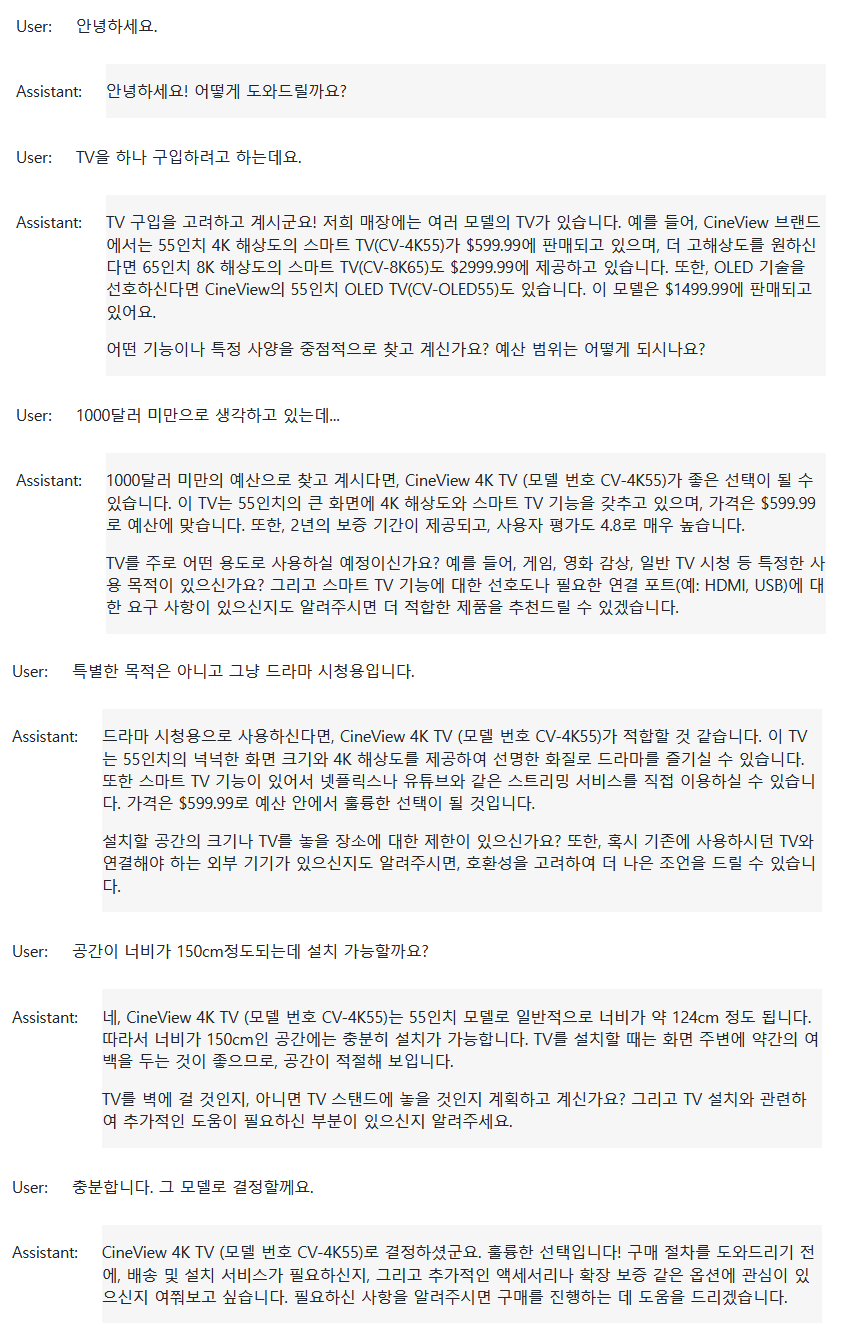

In [ ]:
def collect_messages(user_input, debug=False):
    if debug:
        print(f"User Input = {user_input}")

    if user_input == "":
        return

    global context, MODEL

    response, context = process_user_message(
        user_input,
        all_messages=context,
        model=MODEL,
        debug=False
    )
    context.append({'role':'assistant', 'content':f"{response}"})

    print(user_input)
    print()
    print(response)


In [ ]:
# 초기화

# global 변수로 대화 문맥을 저장할 변수 세팅collect_messages
context = []

# global 변수로 사용 모델을 세팅
MODEL = 'gpt-4-1106-preview'

In [ ]:
user_msg = input("입력: ")
collect_messages(user_msg)

입력: 스마트폰을 구매하고 싶은데요.
스마트폰을 구매하고 싶은데요.

스마트폰을 구매하시려는군요! 저희 매장에서는 SmartX 브랜드의 두 가지 모델을 제공하고 있습니다. 하나는 고급 기능을 갖춘 SmartX ProPhone으로 6.1인치 디스플레이, 128GB 저장 공간, 12MP 듀얼 카메라, 5G 지원을 자랑하며 가격은 $899.99입니다. 다른 하나는 기본적인 사용에 적합한 SmartX MiniPhone으로 4.7인치 디스플레이, 64GB 저장 공간, 8MP 카메라, 4G 지원을 제공하며 가격은 $399.99입니다.

어떤 기능이나 예산을 고려하고 계신지 알려주시면, 더 적합한 제품을 추천드리겠습니다. 또한, 추가적으로 필요한 액세서리가 있으신가요? 예를 들어, 보호 케이스, 무선 충전기, 또는 무선 이어버드 등이 있습니다.
 


In [ ]:
context

[{'role': 'user', 'content': '```스마트폰을 구매하고 싶은데요.```'},
 {'role': 'assistant',
  'content': '관련 제품들의 정보:\n {\n    "name": "SmartX ProPhone",\n    "category": "Smartphones and Accessories",\n    "brand": "SmartX",\n    "model_number": "SX-PP10",\n    "warranty": "1 year",\n    "rating": 4.6,\n    "features": [\n        "6.1-inch display",\n        "128GB storage",\n        "12MP dual camera",\n        "5G"\n    ],\n    "description": "A powerful smartphone with advanced camera features.",\n    "price": 899.99\n}\n{\n    "name": "MobiTech PowerCase",\n    "category": "Smartphones and Accessories",\n    "brand": "MobiTech",\n    "model_number": "MT-PC20",\n    "warranty": "1 year",\n    "rating": 4.3,\n    "features": [\n        "5000mAh battery",\n        "Wireless charging",\n        "Compatible with SmartX ProPhone"\n    ],\n    "description": "A protective case with built-in battery for extended usage.",\n    "price": 59.99\n}\n{\n    "name": "SmartX MiniPhone",\n    "category": "Smar

In [ ]:
user_msg = input("입력: ")
collect_messages(user_msg)

입력: 화면 작은것이 좋을 것 같은데...
화면 작은것이 좋을 것 같은데...

SmartX MiniPhone이 좋은 선택이 될 것 같습니다. 이 모델은 4.7인치의 작은 화면을 가지고 있어 한 손으로 쉽게 사용할 수 있으며, 기본적인 기능에 초점을 맞춘 합리적인 가격의 스마트폰입니다. 가격은 $399.99이며, 64GB의 저장 공간과 8MP 카메라를 제공합니다.

화면 크기 외에 다른 특별히 중요하게 생각하는 기능이 있으신가요? 예를 들어, 카메라 성능, 배터리 수명, 또는 저장 공간 등이 있을 수 있습니다. 추가적으로 필요한 액세서리가 있으신지도 알려주세요.
 


In [ ]:
context

[{'role': 'user', 'content': '```스마트폰을 구매하고 싶은데요.```'},
 {'role': 'assistant',
  'content': '관련 제품들의 정보:\n {\n    "name": "SmartX ProPhone",\n    "category": "Smartphones and Accessories",\n    "brand": "SmartX",\n    "model_number": "SX-PP10",\n    "warranty": "1 year",\n    "rating": 4.6,\n    "features": [\n        "6.1-inch display",\n        "128GB storage",\n        "12MP dual camera",\n        "5G"\n    ],\n    "description": "A powerful smartphone with advanced camera features.",\n    "price": 899.99\n}\n{\n    "name": "MobiTech PowerCase",\n    "category": "Smartphones and Accessories",\n    "brand": "MobiTech",\n    "model_number": "MT-PC20",\n    "warranty": "1 year",\n    "rating": 4.3,\n    "features": [\n        "5000mAh battery",\n        "Wireless charging",\n        "Compatible with SmartX ProPhone"\n    ],\n    "description": "A protective case with built-in battery for extended usage.",\n    "price": 59.99\n}\n{\n    "name": "SmartX MiniPhone",\n    "category": "Smar

In [ ]:
user_msg = input("입력: ")
collect_messages(user_msg)

입력: 추천 해주신 모델이 좋을 것 같아요. 추천해주신 모델을 다시한번 알려주세요.
추천 해주신 모델이 좋을 것 같아요. 추천해주신 모델을 다시한번 알려주세요.

추천해드린 모델은 SmartX MiniPhone입니다. 이 스마트폰은 4.7인치 디스플레이를 갖추고 있어 작은 화면을 선호하시는 분들에게 적합합니다. 64GB의 저장 공간과 8MP 카메라를 제공하며, 가격은 $399.99입니다. 이 제품에 관심이 있으시다면 구매를 도와드릴 수 있습니다. 추가로 필요한 액세서리나 다른 질문이 있으신가요?
 


In [ ]:
context

[{'role': 'user', 'content': '```스마트폰을 구매하고 싶은데요.```'},
 {'role': 'assistant',
  'content': '관련 제품들의 정보:\n {\n    "name": "SmartX ProPhone",\n    "category": "Smartphones and Accessories",\n    "brand": "SmartX",\n    "model_number": "SX-PP10",\n    "warranty": "1 year",\n    "rating": 4.6,\n    "features": [\n        "6.1-inch display",\n        "128GB storage",\n        "12MP dual camera",\n        "5G"\n    ],\n    "description": "A powerful smartphone with advanced camera features.",\n    "price": 899.99\n}\n{\n    "name": "MobiTech PowerCase",\n    "category": "Smartphones and Accessories",\n    "brand": "MobiTech",\n    "model_number": "MT-PC20",\n    "warranty": "1 year",\n    "rating": 4.3,\n    "features": [\n        "5000mAh battery",\n        "Wireless charging",\n        "Compatible with SmartX ProPhone"\n    ],\n    "description": "A protective case with built-in battery for extended usage.",\n    "price": 59.99\n}\n{\n    "name": "SmartX MiniPhone",\n    "category": "Smar

In [ ]:
# debug
# user_input = f"""안녕하세요."""
# response, _ = process_user_message(user_input, all_messages=[], model='gpt-4-1106-preview')
# print(response)

### GRADIO Chatbot Interface

- https://www.gradio.app/docs/chatbot

In [ ]:
import gradio as gr
import random

In [ ]:
# with gr.Blocks() as demo:
#     chatbot = gr.Chatbot()
#     msg = gr.Textbox()
#     clear = gr.ClearButton([msg, chatbot])

#     def respond(message, chat_history):
#         bot_message = random.choice(["How are you?", "I love you", "I'm very hungry"])
#         chat_history.append((message, bot_message))
#         time.sleep(2)

#         return "", chat_history

#     msg.submit(respond, [msg, chatbot], [msg, chatbot])

# demo.launch()

In [ ]:
# 초기화

# global 변수로 대화 문맥을 저장할 변수 세팅
context = []

# global 변수로 사용 모델을 세팅
MODEL = 'gpt-4-1106-preview'

In [ ]:
def collect_messages(user_input, debug=False):
    if debug:
        print(f"User Input = {user_input}")

    if user_input == "":
        return

    global context, MODEL

    response, context = process_user_message(
        user_input,
        all_messages=context,
        model=MODEL,
        debug=debug
    )

    # response = random.choice(["How are you?", "I love you", "I'm very hungry"])
    context.append({'role':'assistant', 'content':f"{response}"})

    return response


def echo(message, history):
    # message: input_msg
    # history: [[user, bot], [user, bot], ...]
    bot_message = collect_messages(message, True)

    return bot_message

In [ ]:
demo = gr.ChatInterface(
    fn = echo,
    examples=["안녕하세요.", "Tv가 구매하고 싶어요.", "스마트폰 하나 사려구요."], # 입력 샘플
    title="ChatGPT API ChatBot"
)

demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://130e498e64ea37066d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
context

[{'role': 'user', 'content': '```안녕하세요```'},
 {'role': 'assistant', 'content': '안녕하세요! 어떻게 도와드릴까요?'},
 {'role': 'user', 'content': '```안녕하세요.```'},
 {'role': 'assistant',
  'content': '안녕하세요! 가전제품에 대해 궁금한 점이 있으신가요? 어떤 도움을 드릴 수 있을까요?'},
 {'role': 'user', 'content': '```스마트폰 하나 구매할까하느네요```'},
 {'role': 'assistant',
  'content': '관련 제품들의 정보:\n {\n    "name": "SmartX ProPhone",\n    "category": "Smartphones and Accessories",\n    "brand": "SmartX",\n    "model_number": "SX-PP10",\n    "warranty": "1 year",\n    "rating": 4.6,\n    "features": [\n        "6.1-inch display",\n        "128GB storage",\n        "12MP dual camera",\n        "5G"\n    ],\n    "description": "A powerful smartphone with advanced camera features.",\n    "price": 899.99\n}\n{\n    "name": "MobiTech PowerCase",\n    "category": "Smartphones and Accessories",\n    "brand": "MobiTech",\n    "model_number": "MT-PC20",\n    "warranty": "1 year",\n    "rating": 4.3,\n    "features": [\n        "5000mAh battery",\n        